In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
from genetic_stuff import *


In [7]:
target = Image.open('pickle.png').convert('RGBA')
# target = target.resize((500, 500))

# make a blank image for the text, initialized to transparent text color
environment = Image.new('RGBA', target.size, (255, 255, 255, 0))

In [285]:
np.asarray(environment).shape

(800, 605, 4)

In [209]:
d = Organism(6, environment, n_points=3)

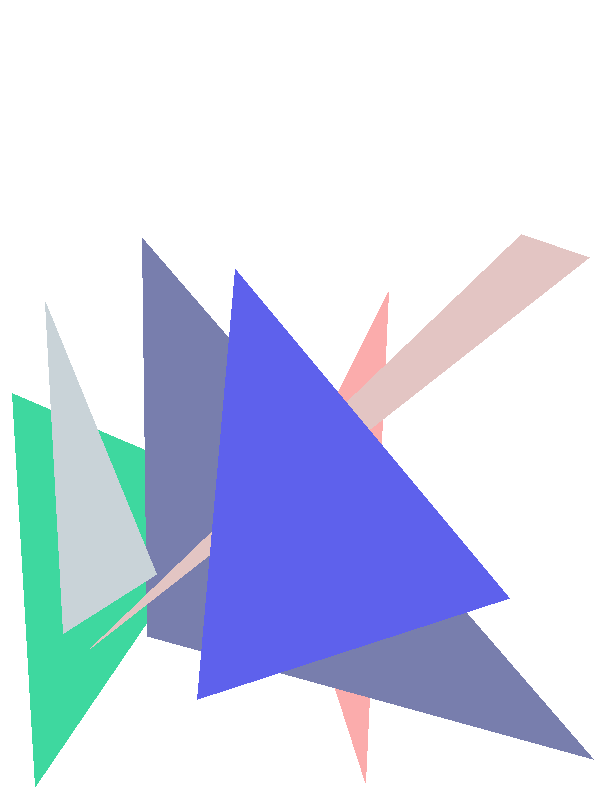

In [210]:
d.draw()

In [173]:
d.genes[0].coordinates = [(0, 0), (d.genes[0].width-10, 0), (d.genes[0].height-10, d.genes[0].height-10), (0, d.genes[0].height-10)]
d.genes[0].color = [0, 0, 0, 128]
d.genes[1].color = [255, 255, 255, 128]
d.genes[1].coordinates = [(0, 0), (d.genes[0].width-10, 0), (d.genes[0].height-10, d.genes[0].height-10), (0, d.genes[0].height-10)]

In [216]:
import cv2

In [230]:
np.array(d.genes[0].coordinates, dtype=np.int32)

array([[ 35, 786],
       [237, 489],
       [ 12, 393]])

In [257]:
color = tuple(map(int, d.genes[0].color))

In [258]:
color2 = tuple(list(color[:-1]) + [50])

In [259]:
color2

(2, 204, 130, 50)

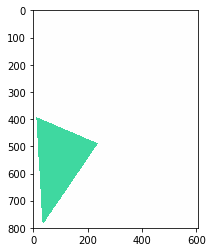

In [264]:
u = np.ones(np.asarray(target).shape).astype('int32')
cv2.fillPoly(u, [np.array(d.genes[0].coordinates, dtype=np.int32)], color)
plt.imshow(u)

In [275]:
type(u)

numpy.ndarray

In [311]:
canvas = np.ones(np.asarray(environment).shape)*255

for polygon in d.genes:
    pts = np.array(polygon.coordinates)
    # pts = pts.reshape((-1, 1, 2))
    col = tuple(map(int, polygon.color[:-1]))

    overlay = canvas
    output = canvas

    alpha = polygon.color[-1]/255
    print(alpha)
    cv2.fillPoly(overlay, [pts], col)

    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, canvas)

0.7607843137254902
0.38823529411764707
0.6274509803921569
1.0
0.3607843137254902
0.9372549019607843


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


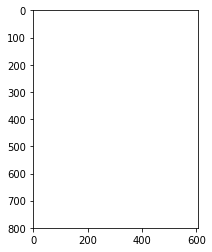

In [313]:
plt.imshow(canvas)

In [307]:
d.genes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


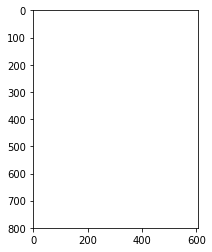

In [305]:
plt.imshow(canvas)

In [303]:
cv2.imshow('canvas' ,canvas)

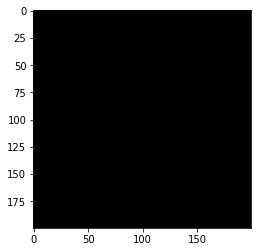

In [241]:
plt.imshow(np.append(np.zeros((200, 200, 3)), np.ones((200, 200, 1)), axis=2))

In [220]:
u.shape

(800, 605, 4)

In [174]:
d.genes[0].color

[0, 0, 0, 128]

In [175]:
d.genes[1].color

[255, 255, 255, 128]

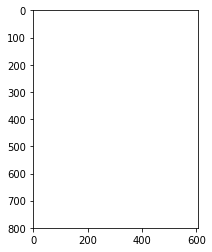

In [178]:
plt.imshow(np.asarray(environment)[..., :-1], alpha=1)

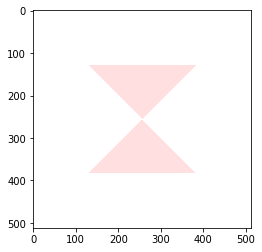

In [200]:
from PIL import Image
from PIL import ImageDraw
back = Image.new('RGBA', (512,512), (255,0,0,0))
poly = Image.new('RGBA', (512,512))
pdraw = ImageDraw.Draw(poly)
pdraw.polygon([(128,128),(384,384),(128,384),(384,128)],
              fill=(255,255,255,127),outline=(255,255,255,255))
back.paste(poly,mask=poly)
back.show()
plt.imshow(back)

In [208]:
y = np.asarray(back)
y[:, :, -1] = 255
plt.imshow(y)

ValueError: assignment destination is read-only

In [206]:
y[..., -1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

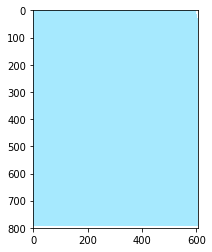

In [179]:
d.genes[1].show()

In [120]:
im = Image.new(COLOR_MODE, d.environment.size, (255, 255, 255, 255))


In [7]:
im = ImageDraw.Draw(environment)

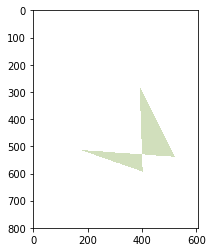

In [14]:
d.genes[0].show()

In [12]:
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

def optimizer(target, environment, pop_size, fitness_func, epochs):
#     root = Tk()
#     panel = Label(root)
    pop = Population(target, pop_size, environment, fitness_func)
    losses = []
    for i in tqdm_notebook(range(epochs)):
        pop.step()
        losses.append(pop.organisms[0].fitness)
        print(f'Iteration: {i} -- Best fitness: {pop.best.fitness} -- Worst fitness: {pop.organisms[-1].fitness}')
        
        if i % 10 == 0:
            plt.imshow(pop.best.draw())
            plt.show()
#             print(f'Loss: {pop.organisms[0].fitness}')
            
#             best_organism = pop.organisms.best
#             worst_organism = pop.organisms.organisms[-1]
#             best_phenotype = draw_phenotype(best_organism)
#             photo_image = ImageTk.PhotoImage(best_phenotype)
#             panel.configure(image=photo_image)
#             panel.image = photo_image
#             panel.pack(side="bottom", fill="both", expand="yes")

#         root.after(EVOLUTION_PERIOD_MS, self.update_panel)
#         root.mainloop()

        
    plt.plot(losses)


Iteration: 0 -- Best fitness: 22369.9140625 -- Worst fitness: 28348.671875


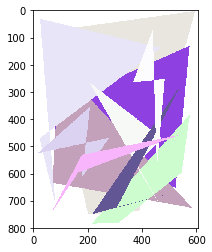

Iteration: 1 -- Best fitness: 21219.9140625 -- Worst fitness: 27370.576171875
Iteration: 2 -- Best fitness: 21219.9140625 -- Worst fitness: 25933.009765625
Iteration: 3 -- Best fitness: 21219.9140625 -- Worst fitness: 25214.330078125
Iteration: 4 -- Best fitness: 21219.9140625 -- Worst fitness: 25089.119140625
Iteration: 5 -- Best fitness: 21219.9140625 -- Worst fitness: 25725.236328125
Iteration: 6 -- Best fitness: 21219.9140625 -- Worst fitness: 24831.15625
Iteration: 7 -- Best fitness: 21219.9140625 -- Worst fitness: 26482.701171875
Iteration: 8 -- Best fitness: 21219.9140625 -- Worst fitness: 26227.322265625
Iteration: 9 -- Best fitness: 21219.9140625 -- Worst fitness: 25662.25390625
Iteration: 10 -- Best fitness: 21219.9140625 -- Worst fitness: 27414.765625


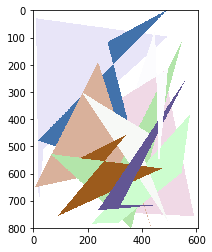

Iteration: 11 -- Best fitness: 21219.9140625 -- Worst fitness: 26430.794921875
Iteration: 12 -- Best fitness: 20995.107421875 -- Worst fitness: 25179.681640625
Iteration: 13 -- Best fitness: 20995.107421875 -- Worst fitness: 26521.220703125
Iteration: 14 -- Best fitness: 20995.107421875 -- Worst fitness: 27604.83203125
Iteration: 15 -- Best fitness: 20995.107421875 -- Worst fitness: 29026.28515625
Iteration: 16 -- Best fitness: 20995.107421875 -- Worst fitness: 26820.515625
Iteration: 17 -- Best fitness: 20995.107421875 -- Worst fitness: 27195.201171875
Iteration: 18 -- Best fitness: 20995.107421875 -- Worst fitness: 27474.97265625
Iteration: 19 -- Best fitness: 20995.107421875 -- Worst fitness: 26948.720703125
Iteration: 20 -- Best fitness: 20995.107421875 -- Worst fitness: 27796.36328125


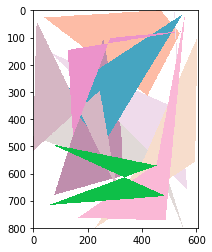

Iteration: 21 -- Best fitness: 20995.107421875 -- Worst fitness: 27301.48828125
Iteration: 22 -- Best fitness: 20995.107421875 -- Worst fitness: 26497.134765625
Iteration: 23 -- Best fitness: 20995.107421875 -- Worst fitness: 27183.814453125
Iteration: 24 -- Best fitness: 20995.107421875 -- Worst fitness: 27709.841796875
Iteration: 25 -- Best fitness: 20995.107421875 -- Worst fitness: 28772.072265625
Iteration: 26 -- Best fitness: 20995.107421875 -- Worst fitness: 27891.8203125
Iteration: 27 -- Best fitness: 20995.107421875 -- Worst fitness: 27690.91015625
Iteration: 28 -- Best fitness: 20995.107421875 -- Worst fitness: 25443.427734375
Iteration: 29 -- Best fitness: 20995.107421875 -- Worst fitness: 26858.96875
Iteration: 30 -- Best fitness: 20995.107421875 -- Worst fitness: 27601.203125


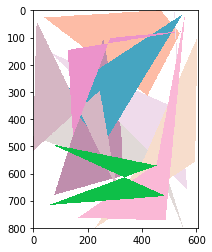

Iteration: 31 -- Best fitness: 20995.107421875 -- Worst fitness: 27256.298828125
Iteration: 32 -- Best fitness: 20995.107421875 -- Worst fitness: 26666.810546875
Iteration: 33 -- Best fitness: 20995.107421875 -- Worst fitness: 27146.78125
Iteration: 34 -- Best fitness: 20995.107421875 -- Worst fitness: 27860.08203125
Iteration: 35 -- Best fitness: 20995.107421875 -- Worst fitness: 28423.330078125
Iteration: 36 -- Best fitness: 20995.107421875 -- Worst fitness: 27272.345703125
Iteration: 37 -- Best fitness: 20995.107421875 -- Worst fitness: 29327.869140625
Iteration: 38 -- Best fitness: 20995.107421875 -- Worst fitness: 27984.990234375
Iteration: 39 -- Best fitness: 20995.107421875 -- Worst fitness: 29019.013671875
Iteration: 40 -- Best fitness: 20995.107421875 -- Worst fitness: 29098.501953125


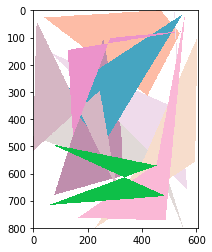

Iteration: 41 -- Best fitness: 20995.107421875 -- Worst fitness: 27613.185546875
Iteration: 42 -- Best fitness: 20995.107421875 -- Worst fitness: 29241.34375
Iteration: 43 -- Best fitness: 20995.107421875 -- Worst fitness: 29262.63671875
Iteration: 44 -- Best fitness: 20995.107421875 -- Worst fitness: 28566.236328125
Iteration: 45 -- Best fitness: 20995.107421875 -- Worst fitness: 26479.505859375
Iteration: 46 -- Best fitness: 20995.107421875 -- Worst fitness: 26395.9140625
Iteration: 47 -- Best fitness: 20995.107421875 -- Worst fitness: 25880.685546875
Iteration: 48 -- Best fitness: 20995.107421875 -- Worst fitness: 27258.22265625
Iteration: 49 -- Best fitness: 20995.107421875 -- Worst fitness: 28212.474609375
Iteration: 50 -- Best fitness: 20995.107421875 -- Worst fitness: 26766.5546875


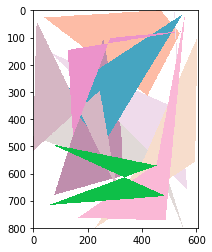

Iteration: 51 -- Best fitness: 20995.107421875 -- Worst fitness: 28246.24609375
Iteration: 52 -- Best fitness: 20995.107421875 -- Worst fitness: 28268.095703125
Iteration: 53 -- Best fitness: 20995.107421875 -- Worst fitness: 29048.9765625
Iteration: 54 -- Best fitness: 20995.107421875 -- Worst fitness: 29651.783203125
Iteration: 55 -- Best fitness: 20995.107421875 -- Worst fitness: 26503.453125
Iteration: 56 -- Best fitness: 20995.107421875 -- Worst fitness: 25741.271484375
Iteration: 57 -- Best fitness: 20995.107421875 -- Worst fitness: 28403.0390625
Iteration: 58 -- Best fitness: 20995.107421875 -- Worst fitness: 29366.06640625
Iteration: 59 -- Best fitness: 20995.107421875 -- Worst fitness: 28551.578125
Iteration: 60 -- Best fitness: 20995.107421875 -- Worst fitness: 29960.453125


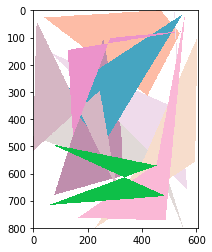

Iteration: 61 -- Best fitness: 20995.107421875 -- Worst fitness: 31974.880859375
Iteration: 62 -- Best fitness: 20995.107421875 -- Worst fitness: 30253.171875
Iteration: 63 -- Best fitness: 20995.107421875 -- Worst fitness: 27275.458984375
Iteration: 64 -- Best fitness: 20995.107421875 -- Worst fitness: 28413.98046875
Iteration: 65 -- Best fitness: 20995.107421875 -- Worst fitness: 29740.9921875
Iteration: 66 -- Best fitness: 20995.107421875 -- Worst fitness: 27337.01171875
Iteration: 67 -- Best fitness: 20995.107421875 -- Worst fitness: 24894.609375
Iteration: 68 -- Best fitness: 20995.107421875 -- Worst fitness: 25182.23828125
Iteration: 69 -- Best fitness: 20995.107421875 -- Worst fitness: 27126.59375
Iteration: 70 -- Best fitness: 20995.107421875 -- Worst fitness: 30026.849609375


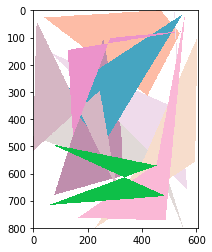

Iteration: 71 -- Best fitness: 20995.107421875 -- Worst fitness: 30471.830078125
Iteration: 72 -- Best fitness: 20995.107421875 -- Worst fitness: 27382.923828125
Iteration: 73 -- Best fitness: 20995.107421875 -- Worst fitness: 26156.1328125
Iteration: 74 -- Best fitness: 20995.107421875 -- Worst fitness: 25663.009765625
Iteration: 75 -- Best fitness: 20995.107421875 -- Worst fitness: 26481.763671875
Iteration: 76 -- Best fitness: 20995.107421875 -- Worst fitness: 25822.072265625
Iteration: 77 -- Best fitness: 20995.107421875 -- Worst fitness: 27475.154296875
Iteration: 78 -- Best fitness: 20995.107421875 -- Worst fitness: 28451.63671875
Iteration: 79 -- Best fitness: 20995.107421875 -- Worst fitness: 28651.75
Iteration: 80 -- Best fitness: 20995.107421875 -- Worst fitness: 28596.935546875


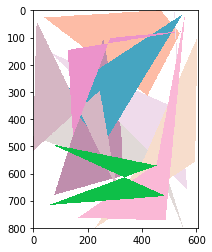

Iteration: 81 -- Best fitness: 20995.107421875 -- Worst fitness: 28414.16796875
Iteration: 82 -- Best fitness: 20995.107421875 -- Worst fitness: 26590.61328125
Iteration: 83 -- Best fitness: 20995.107421875 -- Worst fitness: 25410.3203125
Iteration: 84 -- Best fitness: 20995.107421875 -- Worst fitness: 26986.923828125
Iteration: 85 -- Best fitness: 20214.70703125 -- Worst fitness: 21906.734375
Iteration: 86 -- Best fitness: 20214.70703125 -- Worst fitness: 20548.880859375
Iteration: 87 -- Best fitness: 20214.70703125 -- Worst fitness: 24565.244140625
Iteration: 88 -- Best fitness: 20214.70703125 -- Worst fitness: 26060.48828125
Iteration: 89 -- Best fitness: 20214.70703125 -- Worst fitness: 30103.08203125
Iteration: 90 -- Best fitness: 20214.70703125 -- Worst fitness: 29974.25390625


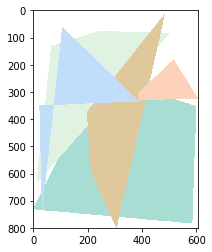

Iteration: 91 -- Best fitness: 20214.70703125 -- Worst fitness: 32864.75
Iteration: 92 -- Best fitness: 20214.70703125 -- Worst fitness: 32071.021484375
Iteration: 93 -- Best fitness: 20214.70703125 -- Worst fitness: 28653.4765625
Iteration: 94 -- Best fitness: 20214.70703125 -- Worst fitness: 28366.4453125
Iteration: 95 -- Best fitness: 20214.70703125 -- Worst fitness: 31000.404296875
Iteration: 96 -- Best fitness: 20214.70703125 -- Worst fitness: 28848.48828125
Iteration: 97 -- Best fitness: 20214.70703125 -- Worst fitness: 30290.08984375
Iteration: 98 -- Best fitness: 20214.70703125 -- Worst fitness: 31000.5625
Iteration: 99 -- Best fitness: 20214.70703125 -- Worst fitness: 25710.2578125
Iteration: 100 -- Best fitness: 20214.70703125 -- Worst fitness: 29809.89453125


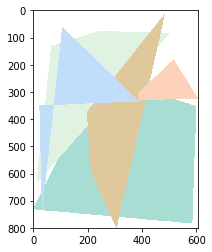

Iteration: 101 -- Best fitness: 20214.70703125 -- Worst fitness: 27511.24609375
Iteration: 102 -- Best fitness: 20214.70703125 -- Worst fitness: 26136.7734375
Iteration: 103 -- Best fitness: 20214.70703125 -- Worst fitness: 25664.341796875
Iteration: 104 -- Best fitness: 20214.70703125 -- Worst fitness: 26535.177734375
Iteration: 105 -- Best fitness: 20214.70703125 -- Worst fitness: 29149.9296875
Iteration: 106 -- Best fitness: 20214.70703125 -- Worst fitness: 28706.869140625
Iteration: 107 -- Best fitness: 20214.70703125 -- Worst fitness: 26108.8671875
Iteration: 108 -- Best fitness: 20214.70703125 -- Worst fitness: 27328.53125
Iteration: 109 -- Best fitness: 20214.70703125 -- Worst fitness: 28159.6796875
Iteration: 110 -- Best fitness: 20214.70703125 -- Worst fitness: 27369.919921875


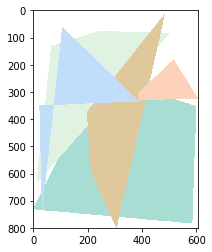

Iteration: 111 -- Best fitness: 20214.70703125 -- Worst fitness: 28555.525390625
Iteration: 112 -- Best fitness: 20214.70703125 -- Worst fitness: 27806.80078125
Iteration: 113 -- Best fitness: 20214.70703125 -- Worst fitness: 26517.22265625
Iteration: 114 -- Best fitness: 20214.70703125 -- Worst fitness: 27821.568359375
Iteration: 115 -- Best fitness: 20214.70703125 -- Worst fitness: 27184.115234375
Iteration: 116 -- Best fitness: 20214.70703125 -- Worst fitness: 29332.341796875
Iteration: 117 -- Best fitness: 20214.70703125 -- Worst fitness: 29165.84375
Iteration: 118 -- Best fitness: 20214.70703125 -- Worst fitness: 29446.03515625
Iteration: 119 -- Best fitness: 20214.70703125 -- Worst fitness: 30105.9921875
Iteration: 120 -- Best fitness: 20214.70703125 -- Worst fitness: 31069.478515625


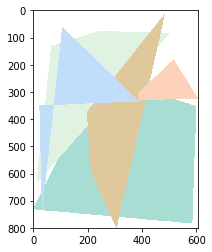

Iteration: 121 -- Best fitness: 20214.70703125 -- Worst fitness: 28225.37109375
Iteration: 122 -- Best fitness: 20214.70703125 -- Worst fitness: 26880.97265625
Iteration: 123 -- Best fitness: 20214.70703125 -- Worst fitness: 27829.8671875
Iteration: 124 -- Best fitness: 20214.70703125 -- Worst fitness: 28841.60546875
Iteration: 125 -- Best fitness: 20214.70703125 -- Worst fitness: 29654.49609375
Iteration: 126 -- Best fitness: 20214.70703125 -- Worst fitness: 28821.98046875
Iteration: 127 -- Best fitness: 20214.70703125 -- Worst fitness: 26560.5
Iteration: 128 -- Best fitness: 20214.70703125 -- Worst fitness: 27726.064453125
Iteration: 129 -- Best fitness: 20214.70703125 -- Worst fitness: 23642.646484375
Iteration: 130 -- Best fitness: 20214.70703125 -- Worst fitness: 24350.765625


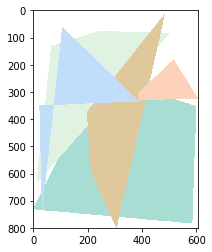

Iteration: 131 -- Best fitness: 20214.70703125 -- Worst fitness: 20717.248046875
Iteration: 132 -- Best fitness: 20214.70703125 -- Worst fitness: 27146.1484375
Iteration: 133 -- Best fitness: 20214.70703125 -- Worst fitness: 26463.64453125
Iteration: 134 -- Best fitness: 20214.70703125 -- Worst fitness: 29034.71484375
Iteration: 135 -- Best fitness: 20214.70703125 -- Worst fitness: 29143.248046875
Iteration: 136 -- Best fitness: 20214.70703125 -- Worst fitness: 28246.666015625
Iteration: 137 -- Best fitness: 20214.70703125 -- Worst fitness: 27419.5
Iteration: 138 -- Best fitness: 20214.70703125 -- Worst fitness: 25912.857421875
Iteration: 139 -- Best fitness: 20214.70703125 -- Worst fitness: 26294.09375
Iteration: 140 -- Best fitness: 20214.70703125 -- Worst fitness: 26926.47265625


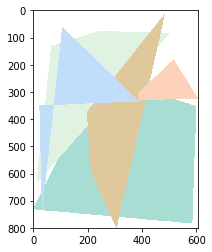

Iteration: 141 -- Best fitness: 20214.70703125 -- Worst fitness: 25193.67578125
Iteration: 142 -- Best fitness: 20214.70703125 -- Worst fitness: 27411.453125
Iteration: 143 -- Best fitness: 20214.70703125 -- Worst fitness: 27787.21875
Iteration: 144 -- Best fitness: 20214.70703125 -- Worst fitness: 30110.439453125
Iteration: 145 -- Best fitness: 20214.70703125 -- Worst fitness: 28738.26953125
Iteration: 146 -- Best fitness: 20214.70703125 -- Worst fitness: 29557.505859375
Iteration: 147 -- Best fitness: 20214.70703125 -- Worst fitness: 29839.984375
Iteration: 148 -- Best fitness: 20214.70703125 -- Worst fitness: 29633.818359375
Iteration: 149 -- Best fitness: 20214.70703125 -- Worst fitness: 30017.9375
Iteration: 150 -- Best fitness: 20214.70703125 -- Worst fitness: 26592.240234375


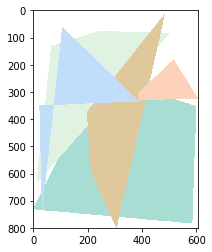

Iteration: 151 -- Best fitness: 20214.70703125 -- Worst fitness: 29288.6015625
Iteration: 152 -- Best fitness: 20214.70703125 -- Worst fitness: 29486.115234375
Iteration: 153 -- Best fitness: 20214.70703125 -- Worst fitness: 26538.021484375
Iteration: 154 -- Best fitness: 20214.70703125 -- Worst fitness: 27680.537109375
Iteration: 155 -- Best fitness: 20214.70703125 -- Worst fitness: 28337.98828125
Iteration: 156 -- Best fitness: 20214.70703125 -- Worst fitness: 26662.033203125
Iteration: 157 -- Best fitness: 20214.70703125 -- Worst fitness: 25559.9375
Iteration: 158 -- Best fitness: 20214.70703125 -- Worst fitness: 25098.58203125
Iteration: 159 -- Best fitness: 20214.70703125 -- Worst fitness: 25071.53515625
Iteration: 160 -- Best fitness: 20214.70703125 -- Worst fitness: 27934.17578125


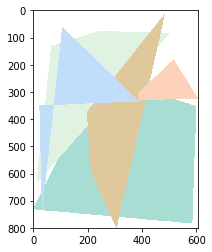

Iteration: 161 -- Best fitness: 20214.70703125 -- Worst fitness: 27900.654296875
Iteration: 162 -- Best fitness: 20214.70703125 -- Worst fitness: 28134.224609375
Iteration: 163 -- Best fitness: 20214.70703125 -- Worst fitness: 28107.4296875
Iteration: 164 -- Best fitness: 20214.70703125 -- Worst fitness: 29285.36328125
Iteration: 165 -- Best fitness: 20214.70703125 -- Worst fitness: 29474.3671875
Iteration: 166 -- Best fitness: 20214.70703125 -- Worst fitness: 26466.25390625
Iteration: 167 -- Best fitness: 20214.70703125 -- Worst fitness: 27143.4140625


In [ ]:
optimizer(target, environment, pop_size=100, fitness_func=mse, epochs=200)